In [2]:
import tensorflow
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data_path='/content/drive/My Drive/Cotton Images/train'
test_data_path='/content/drive/My Drive/Cotton Images/test'

In [5]:
resnet152v2=tensorflow.keras.applications.ResNet152V2(input_shape=[224,224,3],weights='imagenet',include_top=False)

234553344/234545216 [==============================] - 2s 0us/step


In [6]:
for layer in resnet152v2.layers:
  layer.trainable=False

In [7]:
folders=glob('/content/drive/My Drive/Cotton Images/train/*')

In [8]:
x=Flatten()(resnet152v2.output)

In [9]:
prediction=Dense(len(folders),activation='softmax')(x)

In [10]:
model=Model(inputs=resnet152v2.input,outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [14]:
train_data=train_gen.flow_from_directory('/content/drive/My Drive/Cotton Images/train',target_size=[224,224],batch_size=16,class_mode='categorical')
test_data=test_gen.flow_from_directory('/content/drive/My Drive/Cotton Images/test',target_size=[224,224],batch_size=16,class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [15]:
r=model.fit(train_data,validation_data=test_data,epochs=20,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/20
122/122 [==============================] - 816s 7s/step - loss: 1.3090 - accuracy: 0.8411 - val_loss: 0.4085 - val_accuracy: 0.9444
Epoch 2/20
122/122 [==============================] - 42s 346ms/step - loss: 0.8978 - accuracy: 0.9072 - val_loss: 0.2007 - val_accuracy: 0.9444
Epoch 3/20
122/122 [==============================] - 42s 345ms/step - loss: 0.4802 - accuracy: 0.9446 - val_loss: 0.1264 - val_accuracy: 0.9444
Epoch 4/20
122/122 [==============================] - 42s 344ms/step - loss: 0.5563 - accuracy: 0.9472 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 5/20
122/122 [==============================] - 42s 342ms/step - loss: 0.6418 - accuracy: 0.9431 - val_loss: 0.0787 - val_accuracy: 0.9444
Epoch 6/20
122/122 [==============================] - 42s 343ms/step - loss: 0.5954 - accuracy: 0.9539 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
122/122 [==============================] - 42s 341ms/step - loss: 0.3565 - accuracy: 0.9692 - val_loss: 0.8124 - val_

In [16]:
import matplotlib.pyplot as plt

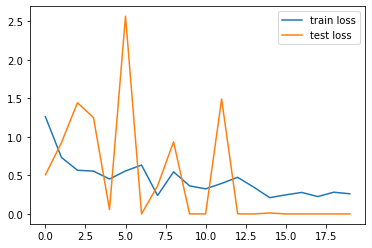

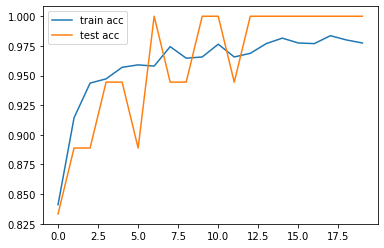

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossTest_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file
model.save('model_resnet152V2.h5')

In [18]:
y_pred = model.predict(test_data)

In [19]:
pwd

'/content'

In [25]:
cp  model_resnet152V2.h5 '/content/drive/My Drive/Colab Notebooks'